##### Create un programma che crea un dataframe sulla base dell'imput dell'utente contenente 4 studenti e le medie dei voti mensili per sei mesi di studio.

Il programma ci restituirà:

- Un grafico contenente 4 grafici più piccoli, uno per ogni studente, con andamento delle medie dei voti per ogni mese;
- Un altro grafico che racchiude tutti gli andamenti di tutti gli studenti



In [75]:
import pandas as pd

import matplotlib.pyplot as plt

In [76]:
mesi=["GEN","FEB", "MAR" ,"APR", "MAG","GIU"]
dati={
    "Leo":   [7, 7.5, 8, 6.5, 7, 8],
    "Bob":     [6, 6.5, 7, 7, 6.5, 7],
    "Chiara":  [8, 8.5, 9, 8, 9, 9.5],
    "Maria":  [5.5, 6, 6.5, 7, 7.5, 8]
}

df= pd.DataFrame(dati, index=mesi)

##### PRIMO GRAFICO - 4 sottografi (uno per ogni studente)


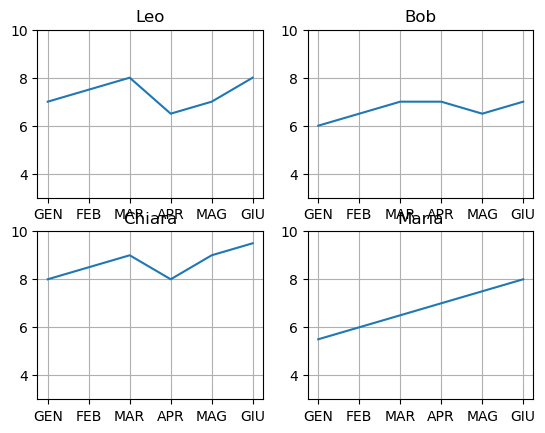

In [77]:
plt.figure()

for i, studente in enumerate(df.columns, start=1):
    plt.subplot(2, 2, i)
    plt.plot(df.index, df[studente])
    plt.title(studente)
    plt.ylim(3,10)
    plt.grid(True)

plt.show()


##### SECONDO GRAFICO - tutti gli studenti insieme


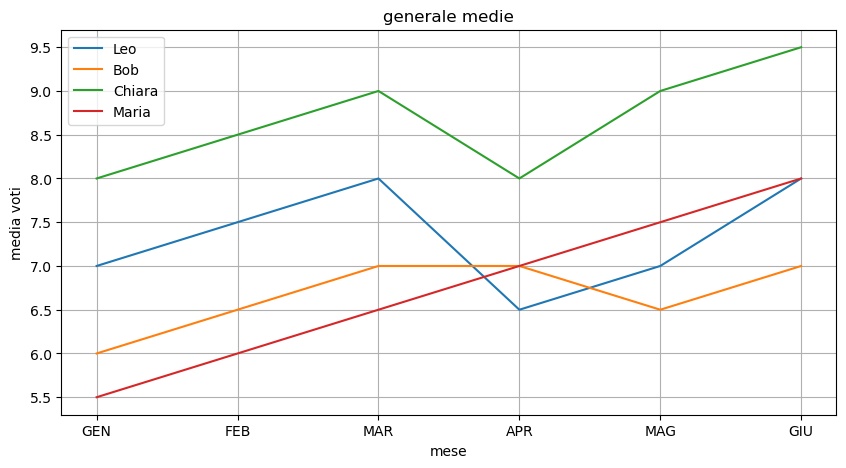

In [78]:
plt.figure(figsize=(10, 5))            

for studente in df.columns:
    plt.plot(mesi, df[studente],label=studente)  # una linea per studente

plt.title("generale medie")
plt.xlabel("mese")
plt.ylabel("media voti")
plt.grid(True)
plt.legend()
plt.show()


Sulla base del dataframe scaricato in precedenza con i dati Netflix:

- Grafico a Torta con le percentuali di prodotti Film per genere;

- Grafico con da distribuzione dei prodotti per paese;

- Grafico con andamento dell'aggiunta dei prodotti nel corso del tempo.



In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("netflix_titles.csv")
df.shape

(8807, 12)

In [80]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


- Grafico a Torta con le percentuali di prodotti Film per genere;


In [81]:
print(df.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


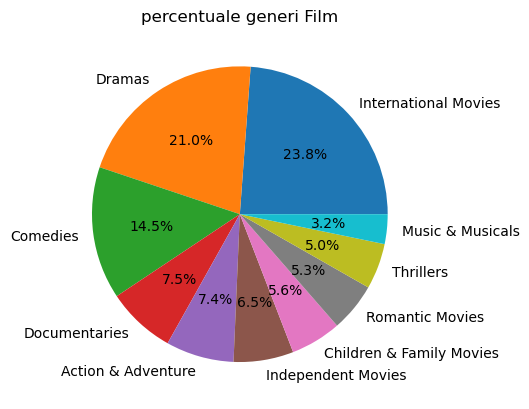

In [82]:
films = df[df['type'] == 'Movie']

all_genres = films['listed_in'].dropna().str.split(',').explode().str.strip()

# Conteggio dei generi più frequenti
genre_counts = all_genres.value_counts().head(10)  # mostro i primi 10

plt.figure()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')

plt.title('percentuale generi Film')
plt.show()


- Grafico con da distribuzione dei prodotti per paese

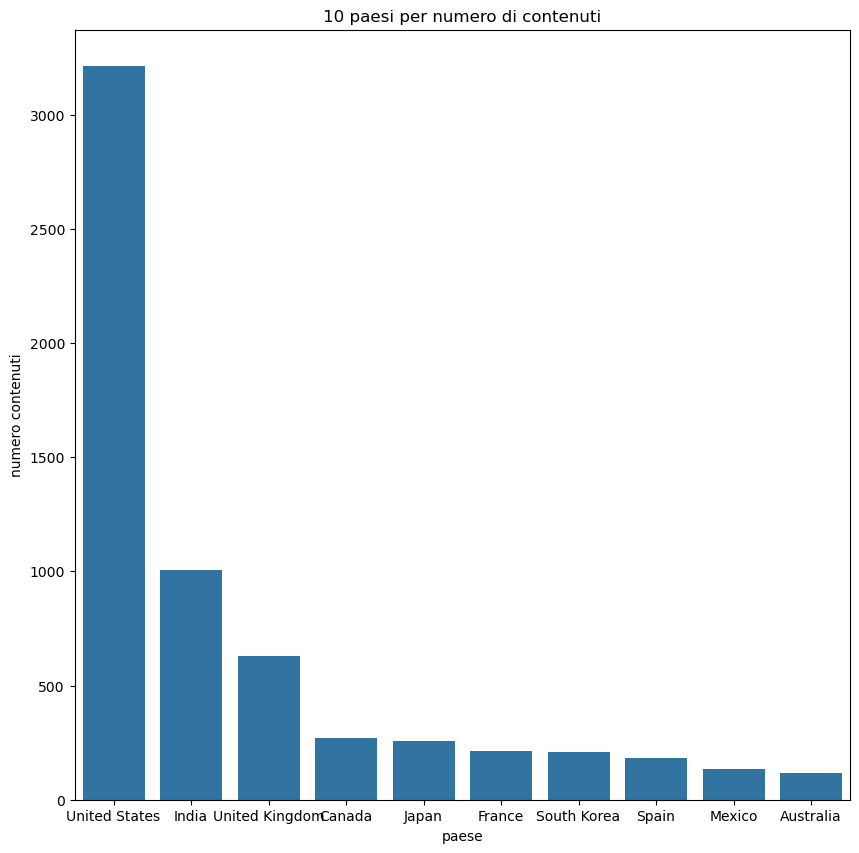

In [83]:

#drop nan e lambda solo il primo paese
df['main_country'] = df['country'].dropna().apply(lambda x: x.split(',')[0].strip())

# primi 10 paesi
top_countries = df['main_country'].value_counts().head(10)

# Grafico a barre orizzontale
plt.figure(figsize=(10,10))

sns.barplot(x=top_countries.index , y=top_countries.values)

plt.title('10 paesi per numero di contenuti')
plt.xlabel('paese')
plt.ylabel('numero contenuti')

plt.show()


- Grafico con andamento dell'aggiunta dei prodotti nel corso del tempo.


C:\Users\lauda\AppData\Local\Temp\ipykernel_32620\3057671333.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_added'] = df['date_added'].dt.year


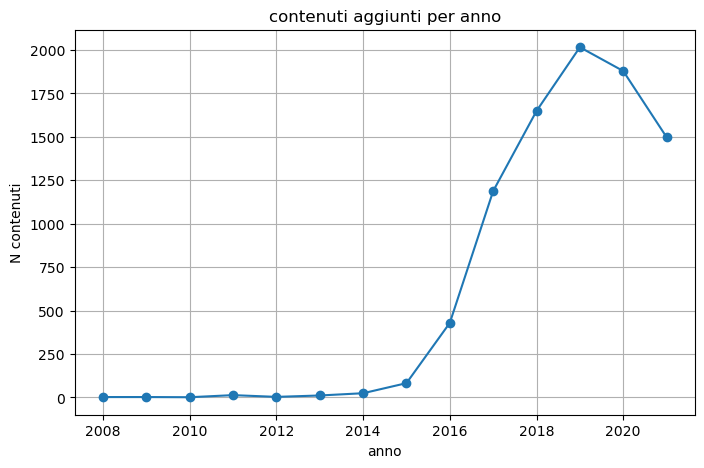

In [84]:

# rimuovo spazi superflui e converto in datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())

# drop righe senza data valida
df = df.dropna(subset=['date_added'])

df['year_added'] = df['date_added'].dt.year

counts = df['year_added'].value_counts().sort_index()

# Grafico lineare semplice
plt.figure(figsize=(8, 5))
plt.plot(counts.index, counts.values, marker='o')
plt.title('contenuti aggiunti per anno')
plt.xlabel('anno')
plt.ylabel('N contenuti')
plt.grid(True)
plt.show()


In [85]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,main_country,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India,2021
